# ORIE 4580/5580/5581 Assignment 4

#### Students: Yik Hau Au (ya293) and Dionisius Davido Tjajono (dt565)

### Github link: [example Github link](https://github.com/restinghouse0203/Academic_Project/tree/main/Simluation/ORIE5580_Cornell)


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [29]:
# Preamble to make sure we have all packages we need
import numpy as np
from scipy.stats import norm

# Configuring matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

In [30]:
np.random.seed(42)

P = 10000
arrival_time = np.sort(np.random.uniform(0 ,1000, P))
t=30
p_on_bus = [t-p for p in arrival_time if p<=t and p > t-10]

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

In [31]:
waiting_time_per_train = []
for t in range(0,1000,10):
  p_on_bus = [t-p for p in arrival_time if p<=t and p > t-10]
  waiting_time_per_train.extend(p_on_bus)

se = np.std(waiting_time_per_train, ddof=1)/np.sqrt(len(waiting_time_per_train))
mean = np.mean(waiting_time_per_train)
LB_CI = mean-1.96*se
UB_CI = mean+1.96*se

# report
print(f"Estimated Mean of passenger per bus: {mean:.4f}")
print(f"95% CI: {float(LB_CI):.4f}, {float(UB_CI) :.4f}")

Estimated Mean of passenger per bus: 5.0175
95% CI: 4.9606, 5.0744


<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

In [32]:
np.random.seed(42)

waiting_time_per_train = []
t_expo_list = []
time_of_arrival_of_train = [0]
t=0
while t<1000:
  t_expo = np.random.exponential(10)
  t = t + t_expo
  p_on_bus = [t-p for p in arrival_time if p<=t and p > time_of_arrival_of_train[-1]]
  t_expo_list.append(t_expo)
  waiting_time_per_train.extend(p_on_bus)
  time_of_arrival_of_train.append(t)

se = np.std(waiting_time_per_train, ddof=1)/np.sqrt(len(waiting_time_per_train))
mean = np.mean(waiting_time_per_train)
LB_CI = mean-1.96*se
UB_CI = mean+1.96*se

# report
print(f"Estimated Mean of passenger per bus: {mean:.4f}")
print(f"95% CI: {float(LB_CI):.4f}, {float(UB_CI) :.4f}")

Estimated Mean of passenger per bus: 9.1382
95% CI: 8.9774, 9.2990


<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [33]:
se = np.std(t_expo_list, ddof=1)/np.sqrt(len(t_expo_list))
mean = np.mean(t_expo_list)
LB_CI = mean-1.96*se
UB_CI = mean+1.96*se

# report
print(f"Estimated Mean of passenger per bus: {mean:.4f}")
print(f"95% CI: {float(LB_CI):.4f}, {float(UB_CI) :.4f}")

print(f"10 is in within the 95% CI, so agree")

Estimated Mean of passenger per bus: 9.0021
95% CI: 7.3236, 10.6806
10 is in within the 95% CI, so agree


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

In [34]:
int_time_train = []
for i in range(len(time_of_arrival_of_train)):
  upcoming_t = time_of_arrival_of_train[i]
  previous_t = time_of_arrival_of_train[i-1]
  # copies of deviation of multiple of 10 on each train
  int_time_train.extend([upcoming_t-previous_t for p in arrival_time if p<=upcoming_t and p > previous_t])

se = np.std(int_time_train, ddof=1)/np.sqrt(len(int_time_train))
mean = np.mean(int_time_train)
LB_CI = mean-1.96*se
UB_CI = mean+1.96*se

# report
print(f"Estimated Mean of arrival time per interval: {mean:.4f}")
print(f"95% CI: {float(LB_CI):.4f}, {float(UB_CI) :.4f}")
print("More people in the delayed train so the weighted average got scaled up")

Estimated Mean of arrival time per interval: 18.0669
95% CI: 17.8498, 18.2840
More people in the delayed train so the weighted average got scaled up


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

If the train is late, there will be more people waiting and thus the average waiting time increase. Therefore, it is easier to pick someone with a higher late time.
It is due the fact that the probability of a passenger arriving in an interval is proportional to the length of that interval, hence the bias towards longer waits.

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

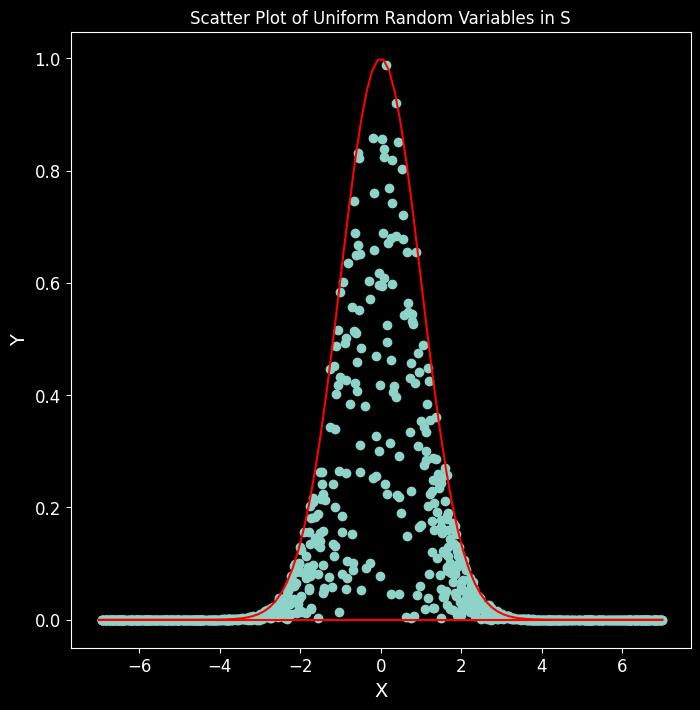

In [35]:
N = 1000
np.random.seed(42)

X = []
Y = []

for i in range(N):
  X.append(np.random.uniform(low=-7, high=7))
  Y.append(np.random.uniform(0, np.exp(-X[i]**2/2)))

x = np.linspace(-7,7,100)
y_pdf = np.exp(-x**2/2)
y_0 = np.zeros(100)

plt.scatter(X, Y)
plt.plot(x, y_pdf, 'r-', label='Y pdf')
plt.plot(x, y_0, 'r-', label='Y=0')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Uniform Random Variables in S')
plt.show()

<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

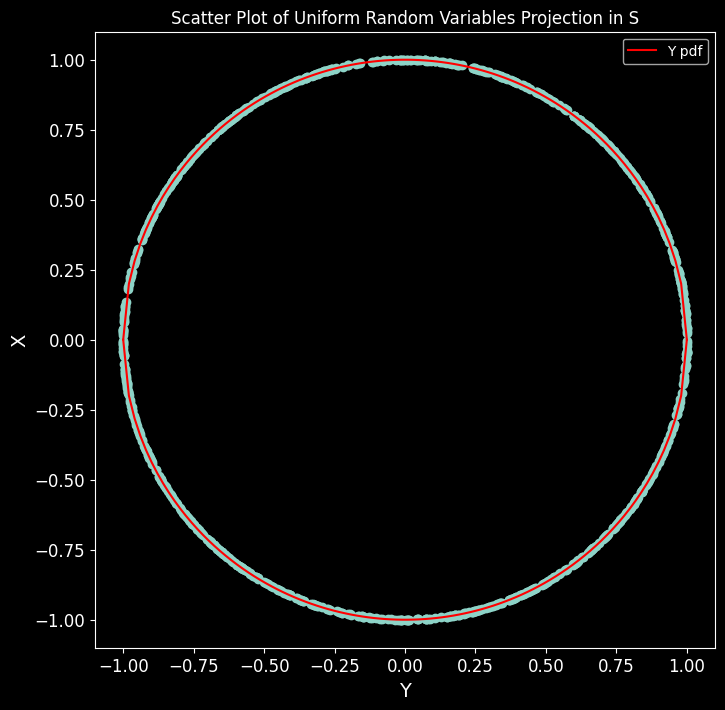

In [36]:
N = 1000
np.random.seed(42)

X = []
Y = []

U = np.random.uniform(-1,1,N)
V = np.random.uniform(-1,1,N)

X = U/np.sqrt(U**2+V**2)
Y = V/np.sqrt(U**2+V**2)

x = np.linspace(-1,1,100)
y1_pdf = np.sqrt(1-x**2)
y2_pdf = -np.sqrt(1-x**2)

plt.scatter(X, Y)
plt.plot(x, y1_pdf, 'r-', label='Y pdf')
plt.plot(x, y2_pdf, 'r-')
plt.xlabel('Y')
plt.ylabel('X')
plt.legend()
plt.title('Scatter Plot of Uniform Random Variables Projection in S')
plt.show()

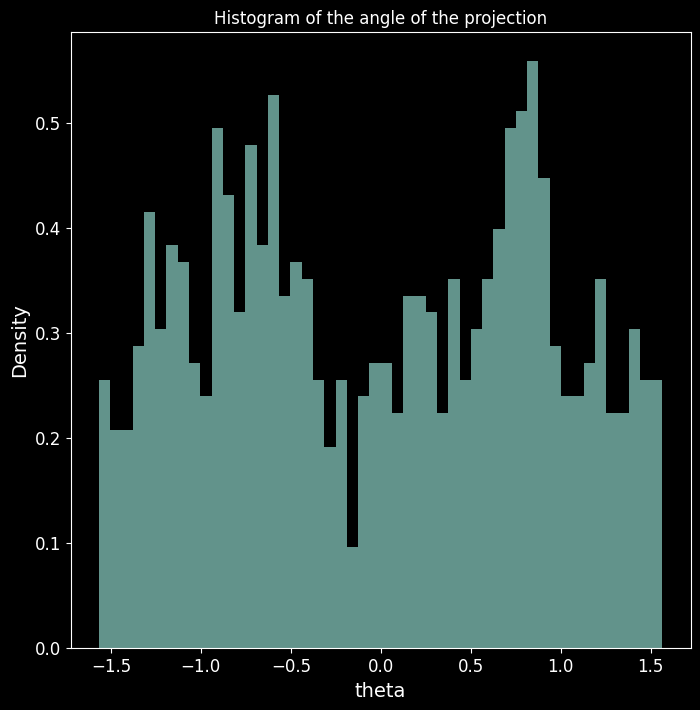

In [37]:
theta = np.arctan(Y/X)
plt.hist(theta, bins=50, density=True, alpha=0.7)
plt.xlabel('theta')
plt.ylabel('Density')
plt.title('Histogram of the angle of the projection')
plt.show()

<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

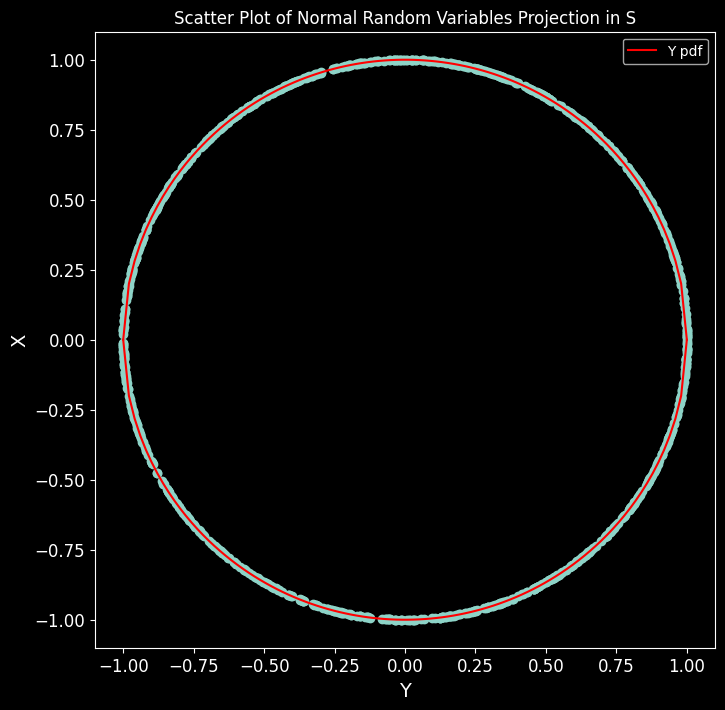

In [38]:
N = 1000
np.random.seed(42)

X = []
Y = []

Z = np.random.normal(0, 1,N)
W = np.random.normal(0, 1,N)

X = Z/np.sqrt(Z**2+W**2)
Y = W/np.sqrt(Z**2+W**2)

x = np.linspace(-1,1,100)
y1_pdf = np.sqrt(1-x**2)
y2_pdf = -np.sqrt(1-x**2)

plt.scatter(X, Y)
plt.plot(x, y1_pdf, 'r-', label='Y pdf')
plt.plot(x, y2_pdf, 'r-')
plt.xlabel('Y')
plt.ylabel('X')
plt.legend()
plt.title('Scatter Plot of Normal Random Variables Projection in S')
plt.show()

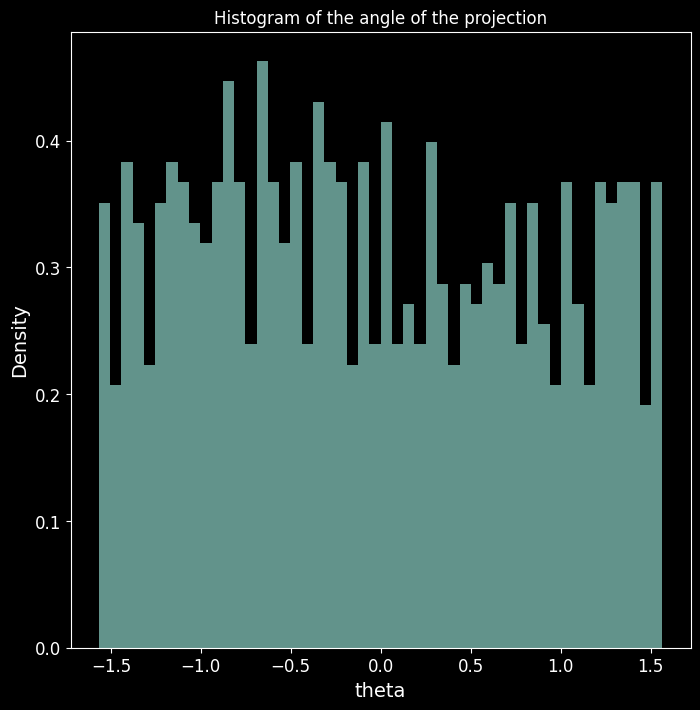

In [39]:
theta = np.arctan(Y/X)
plt.hist(theta, bins=50, density=True, alpha=0.7)
plt.xlabel('theta')
plt.ylabel('Density')
plt.title('Histogram of the angle of the projection')
plt.show()

The part b generated the projection more on the diagonal line than the perpendicular and vertical line because it has higher possibility on reaching the diagonal for uniform (x,y) coordinate, that's why it has period in the histogram for the projection angle.
Meanwhile, normal (x,y) doesn't have such issue so the projection angle is like uniform.

<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.


In [40]:
prob = norm.cdf(0.14/np.sqrt(0.0625))*(norm.cdf(0.07/np.sqrt(0.01)))*norm.cdf(0.16/np.sqrt(0.09))
print(f"The probability them all have positive return is {prob:.3g}")

The probability them all have positive return is 0.38


<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [41]:
def BoxMuller(n):
    """
    Generate random samples from the standard normal distribution using the Box-Muller method.

    Parameters:
    n (int): The number of samples to generate.

    Returns:
    tuple: A tuple containing two arrays of N(0,1) samples.
    """
    # Generate 2*n Uniform[0,1] random variables and set u_1 as the even entries and u_2 as the odd entries of U
    u = np.random.rand(3 * n)
    u_1 = u[0::3]
    u_2 = u[1::3]

    r = np.sqrt(-2.0 * np.log(u_1))
    theta = 2.0 * np.pi * u_2
    n_1 = r * np.cos(theta)
    n_2 = r * np.sin(theta)
    return n_1, n_2

def BoxMuller_AR(n):
    """
    Generate random samples from the standard normal distribution using Box-Muller with Acceptance-Rejection.

    Parameters:
    n (int): The number of samples to generate.

    Returns:
    tuple: A tuple containing two arrays of N(0,1) samples.
    """
    n_1 = np.zeros(n)
    n_2 = np.zeros(n)
    i = 0
    while i < n - 1:
        u = 2 * np.random.rand(2) - 1 #u[0] & u[1] \in [-1,1]
        w = u[0]**2 + u[1]**2
        if w <= 1: # accept if the point is within unit circle (why unit circle?)
            i = i + 1
            n_1[i] = u[0] * np.sqrt(-2.0 * np.log(w) / w) #box-muller transform
            n_2[i] = u[1] * np.sqrt(-2.0 * np.log(w) / w)
    return n_1, n_2


In [42]:
mean = [0.14, 0.07, 0.16]
cov = [[0.0625, -0.01, 0.0375],
       [-0.01, 0.01, -0.015],
       [0.0375, -0.015, 0.09]]

N = 10000
X = BoxMuller(N)
Y = BoxMuller(N)[0]
normal_rv = np.array([X[0],X[1],Y])

L_1 = np.linalg.cholesky(cov)
Y_1 = np.dot(L_1,normal_rv).T + mean
prob = len([p for p in Y_1 if np.all(p>0)])/Y_1.shape[0]
print(f"The probability them all have positive return is {prob:.3g}")

The probability them all have positive return is 0.372


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.


$(\alpha + \beta)/2=0,$
$(\beta-\alpha)/12=1,$/
We have $\beta=\sqrt(3),\alpha=-\sqrt(3)$

<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.


$E(V_2) = (1-p)E(X_1)+pE(X_2)=0$

$Var(V_2) = p(1-p)Var(X_1)+p(1-p)Var(X_2)=2p(1-p)$

<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

$Cov(V_1,V_2) = E((X_1-E(X_1))(V_2-E(V_2)) = E(X_1((1-B)X_1+BX_2)) = (1-p)=\sigma_{1,2}$

$p=1-\sigma_{1,2}$

## Ans.


<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

In [43]:
def corr_unif2(sigma, n):
  p = [1 - sigma, sigma]
  X = np.random.uniform(-np.sqrt(3),np.sqrt(3),(2,n))
  V1 = X[0]
  V2 = np.zeros(n)
  choice = np.random.choice([1,0], size=n,p=p)
  for i in range(n):
    V2[i] = X[choice[i], i]
  return V1, V2

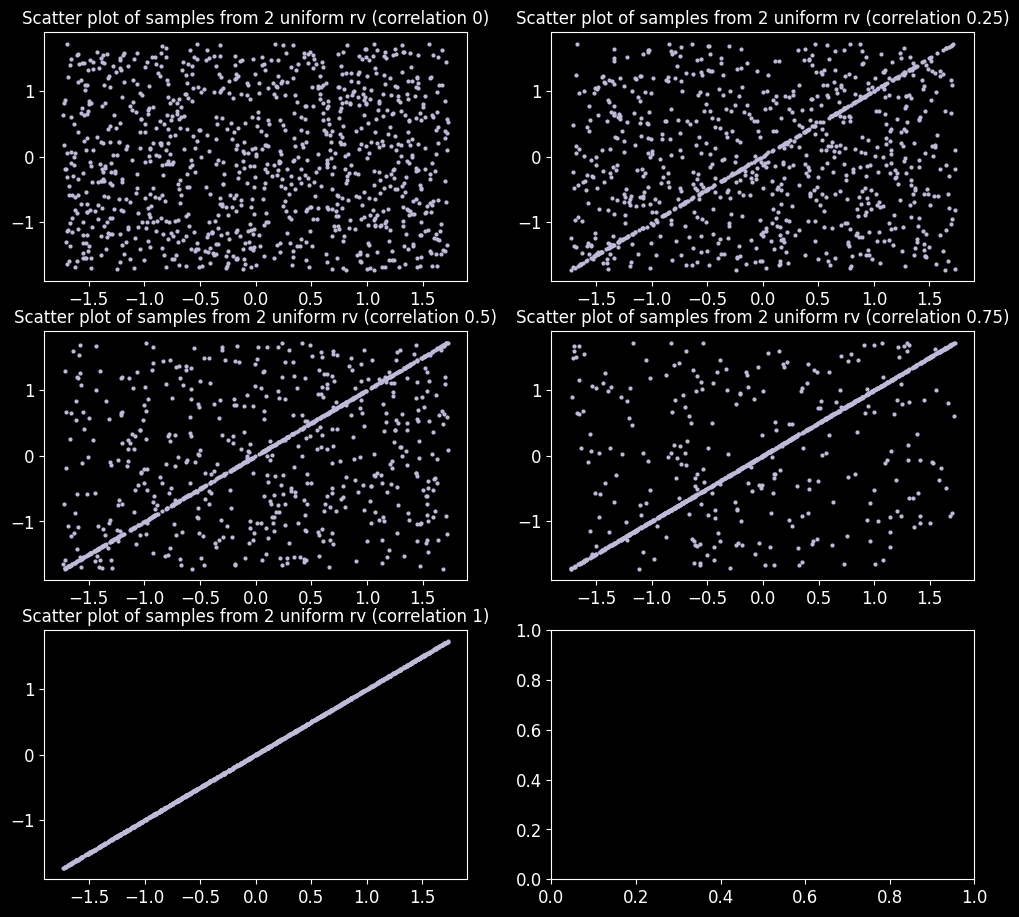

In [44]:
n = 1000
fig, axes = plt.subplots(3, 2, figsize=(12,11))
sigma = [0, 0.25, 0.5, 0.75, 1]
k = 0
for i in range(3):
  for j in range(2):
    if k == 5:
      break
    V1, V2 = corr_unif2(sigma[k], n)
    axes[i][j].scatter(V1,V2,s=4,color=cmap(2))
    axes[i][j].set_title(f"Scatter plot of samples from 2 uniform rv (correlation {sigma[k]})")
    k+=1
plt.show()

<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [45]:
np.random.seed(42)
n = 1000
V1, V2 = corr_unif2(0.5, n)
Prob = np.mean((V1 <= 0) & (V2 <= 0))
print(f"The required probability is {Prob}")

The required probability is 0.368


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.


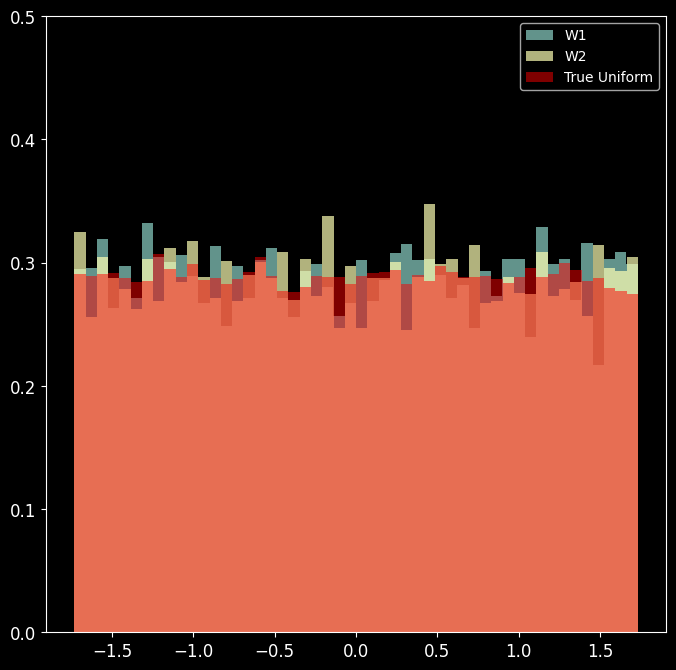

The expect value of W1 and W2 are -0.0068 and -0.00087
The variance of W1 and W2 are 1 and 1


In [46]:
np.random.seed(42)
alpha = -np.sqrt(3)
beta = np.sqrt(3)
n = 10000
cov = [[1, 0.5],
       [0.5, 1]]
mean = [0,0]
Z1,Z2 = np.random.multivariate_normal(mean, cov, size=n).T
W1 = alpha+(beta-alpha)*norm.cdf(Z1)
W2 = alpha+(beta-alpha)*norm.cdf(Z2)

unif = np.random.uniform(alpha,beta,100000)
plt.ylim(0, 0.5)
plt.hist(W1,density=True, bins=50, alpha=0.7, label='W1')
plt.hist(W2,density=True,bins=50, alpha=0.7, label='W2')
plt.hist(unif, density = True,bins=50, alpha=0.5, label='True Uniform', color='r')
plt.legend()
plt.show()

print(f"The expect value of W1 and W2 are {np.mean(W1).item():.2g} and {np.mean(W2).item():.2g}")
print(f"The variance of W1 and W2 are {np.var(W1).item():.2g} and {np.var(W2).item():.2g}")

Its pdf shape is simliar to the true uniform distribution

In [47]:
def gen_W(alpha,beta,n, mean, cov):
  Z1,Z2 = np.random.multivariate_normal(mean, cov, size=n).T
  W1 = alpha+(beta-alpha)*norm.cdf(Z1)
  W2 = alpha+(beta-alpha)*norm.cdf(Z2)
  return W1, W2

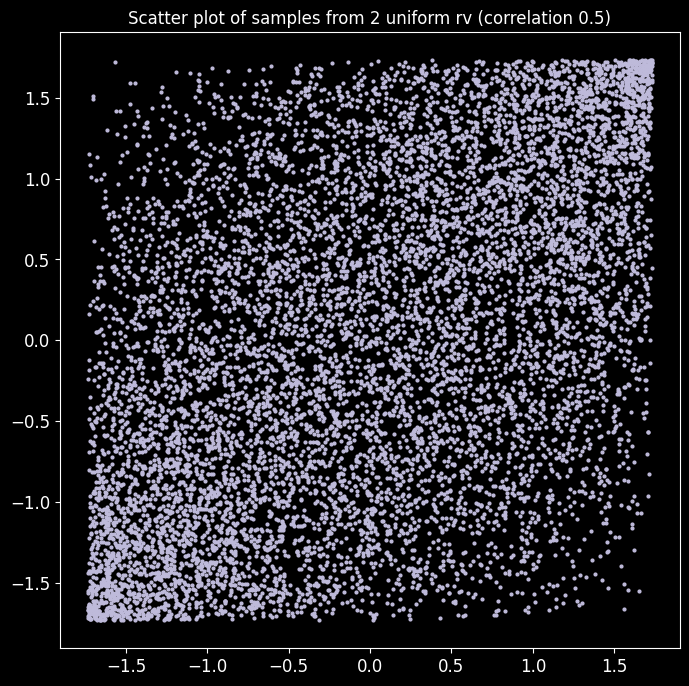

In [48]:
np.random.seed(42)
alpha = -np.sqrt(3)
beta = np.sqrt(3)
n = 10000
sigma = [0.5]
cov = [[1, 0.5],
      [0.5, 1]]
mean = [0,0]

W1, W2 = gen_W(alpha, beta, n ,mean, cov)
plt.scatter(W1,W2,s=4,color=cmap(2))
plt.title(f"Scatter plot of samples from 2 uniform rv (correlation {sigma[0]})")
plt.show()

In [49]:
np.random.seed(42)
alpha = -np.sqrt(3)
beta = np.sqrt(3)
n = 10000
W1, W2 = gen_W(alpha, beta, n ,mean, cov)
Prob = (sum(W1<=0)+sum(W2<=0))/(2*n)
print(f"The required probability is {Prob}")

The required probability is 0.50055


# Clarification
Some part of this file was generated with the help of LLM AI assistant for skeleton code and topic explanation.